In [27]:
library(ggplot2)
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



<img src = './ggplot2_faceting.png'/>

# Wrap a 1d ribbon of panels into 2d

**`facet_wrap()`**: wraps a 1d sequence of panels into 2d. This is generally a better use of screen space than `facet_grid()` because most displays are roughly rectangular.

```R
facet_wrap(
  facets,
  nrow = NULL,
  ncol = NULL,
  scales = "fixed",
  shrink = TRUE,
  labeller = "label_value",
  as.table = TRUE,
  switch = NULL,
  drop = TRUE,
  dir = "h",
  strip.position = "top"
)
```

**Arguments**  
`facets`	
A set of variables or expressions quoted by vars() and defining faceting groups on the rows or columns dimension. The variables can be named (the names are passed to labeller).

For compatibility with the classic interface, can also be a formula or character vector. Use either a one sided formula, ~a + b, or a character vector, c("a", "b").

`nrow`, `ncol`	
Number of rows and columns.

`scales`	
Should scales be fixed ("fixed", the default), free ("free"), or free in one dimension ("free_x", "free_y")?

`shrink`	
If TRUE, will shrink scales to fit output of statistics, not raw data. If FALSE, will be range of raw data before statistical summary.

`labeller`	
A function that takes one data frame of labels and returns a list or data frame of character vectors. Each input column corresponds to one factor. Thus there will be more than one with vars(cyl, am). Each output column gets displayed as one separate line in the strip label. This function should inherit from the "labeller" S3 class for compatibility with labeller(). You can use different labeling functions for different kind of labels, for example use label_parsed() for formatting facet labels. label_value() is used by default, check it for more details and pointers to other options.

`as.table`	
If TRUE, the default, the facets are laid out like a table with highest values at the bottom-right. If FALSE, the facets are laid out like a plot with the highest value at the top-right.

`switch`	
By default, the labels are displayed on the top and right of the plot. If "x", the top labels will be displayed to the bottom. If "y", the right-hand side labels will be displayed to the left. Can also be set to "both".

`drop`	
If TRUE, the default, all factor levels not used in the data will automatically be dropped. If FALSE, all factor levels will be shown, regardless of whether or not they appear in the data.

`dir`	
Direction: either "h" for horizontal, the default, or "v", for vertical.

`strip.position`	
By default, the labels are displayed on the top of the plot. Using strip.position it is possible to place the labels on either of the four sides by setting strip.position = c("top", "bottom", "left", "right")

<hr>`

<b style = 'color:red'>NOTE</b><br>  
`facet_grid(scales = 'fixed')`: `sharex = True, sharey = True` in MATPLOTLIB  
`facet_grid(scales = 'free_x')`: `sharex = False` in MATPLOTLIB  
`facet_grid(scales = 'free_y')`: `sharey = False` in MATPLOTLIB  
`facet_grid(scales = 'free')`: `sharex = False, sharey = False` in MATPLOTLIB  


# Example

In [5]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


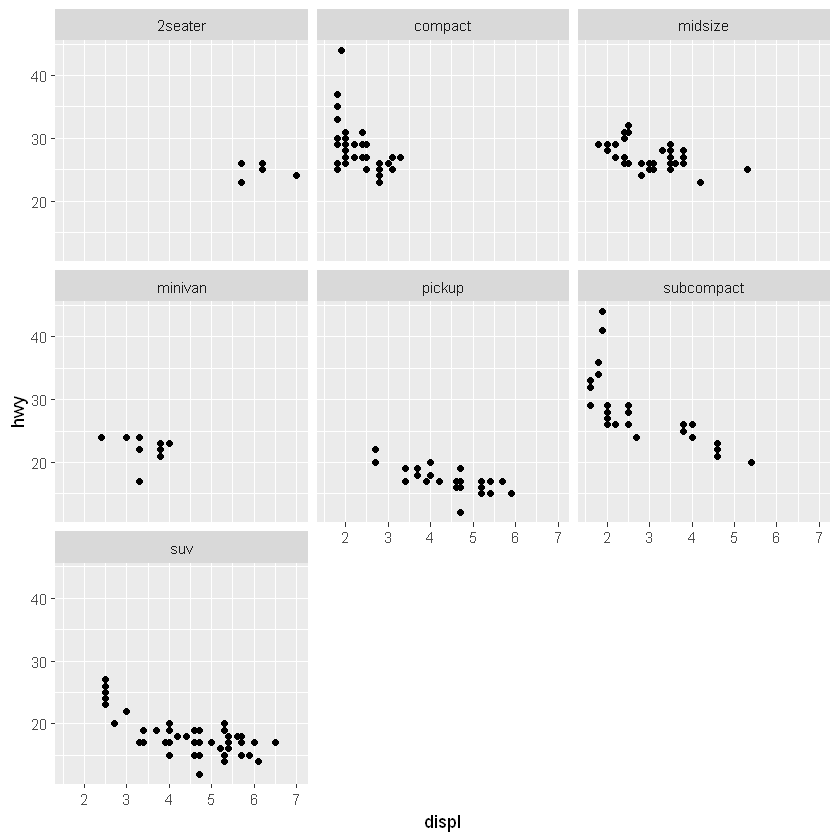

In [11]:
plot <- ggplot(mpg, aes(displ, hwy)) + geom_point()
# Use vars() to supply faceting variables:
plot + facet_wrap(vars(class))

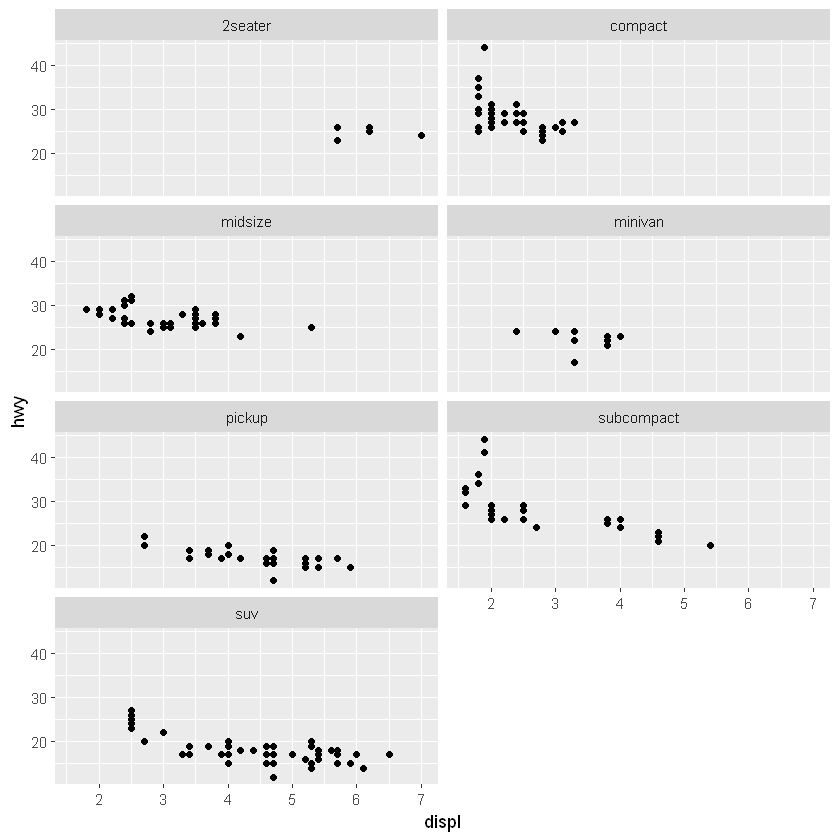

In [14]:
# Control the number of rows and columns with nrow and ncol
plot + 
facet_wrap(~class, nrow = 4)

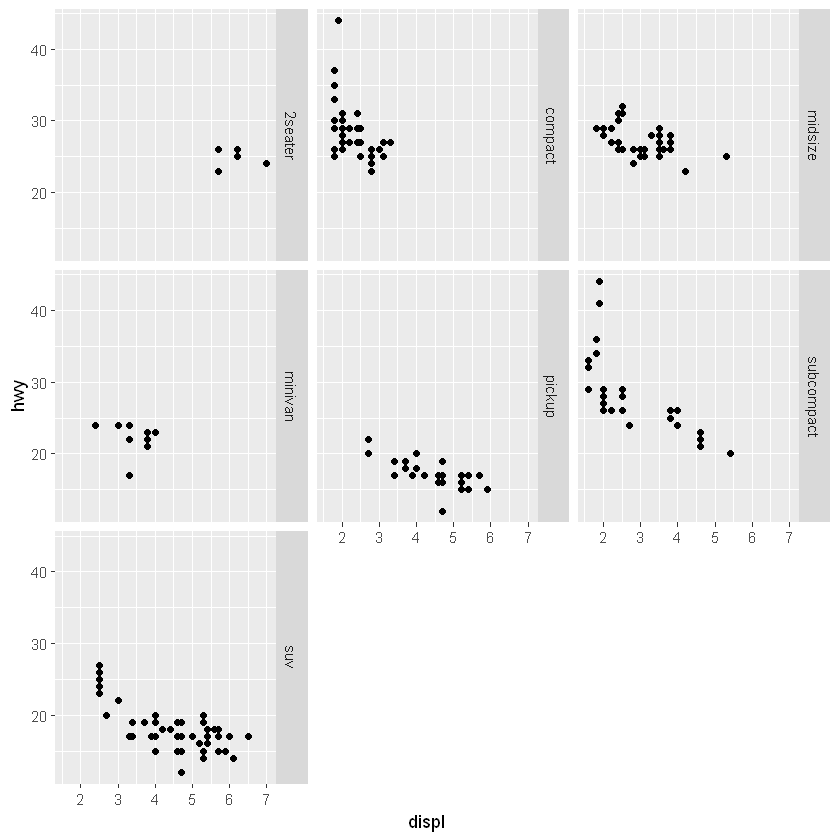

In [56]:
#play strip to the right of each facet
plot +
facet_wrap(~class, strip.position = 'right')

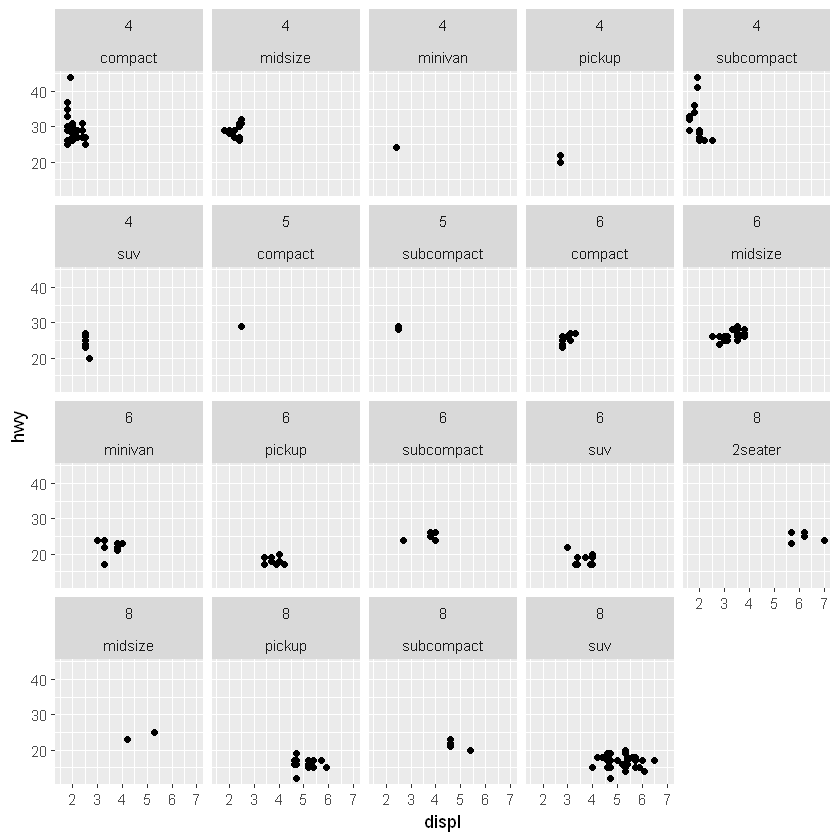

In [15]:
# You can facet by multiple variables
plot + 
facet_wrap(cyl ~ class)

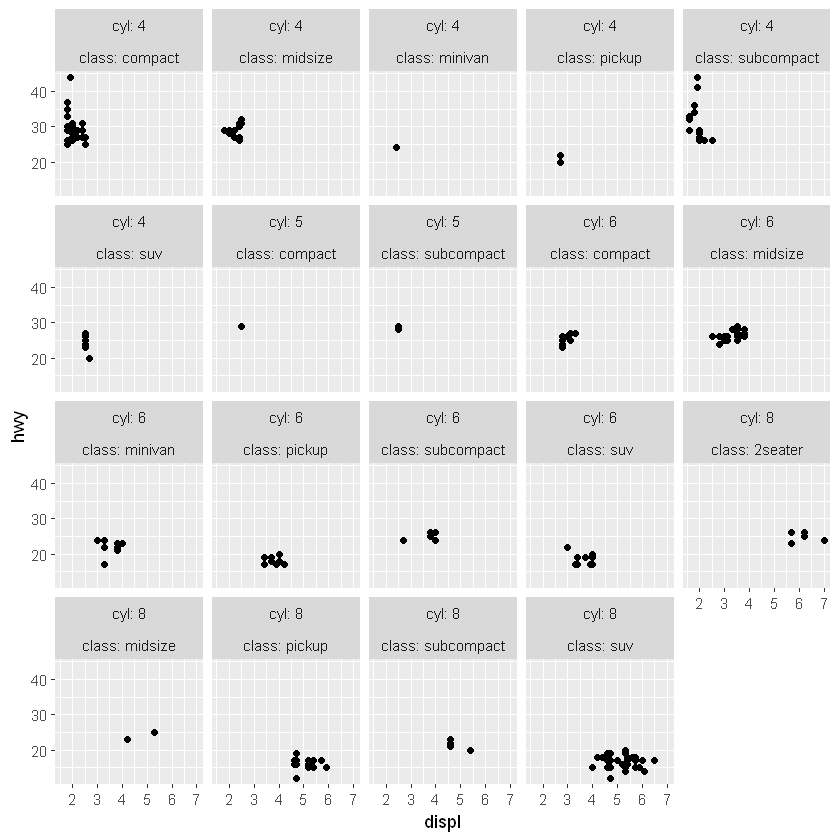

In [16]:
# Use the `labeller` option to control how labels are printed:
plot + 
facet_wrap(cyl ~ class, labeller = 'label_both')

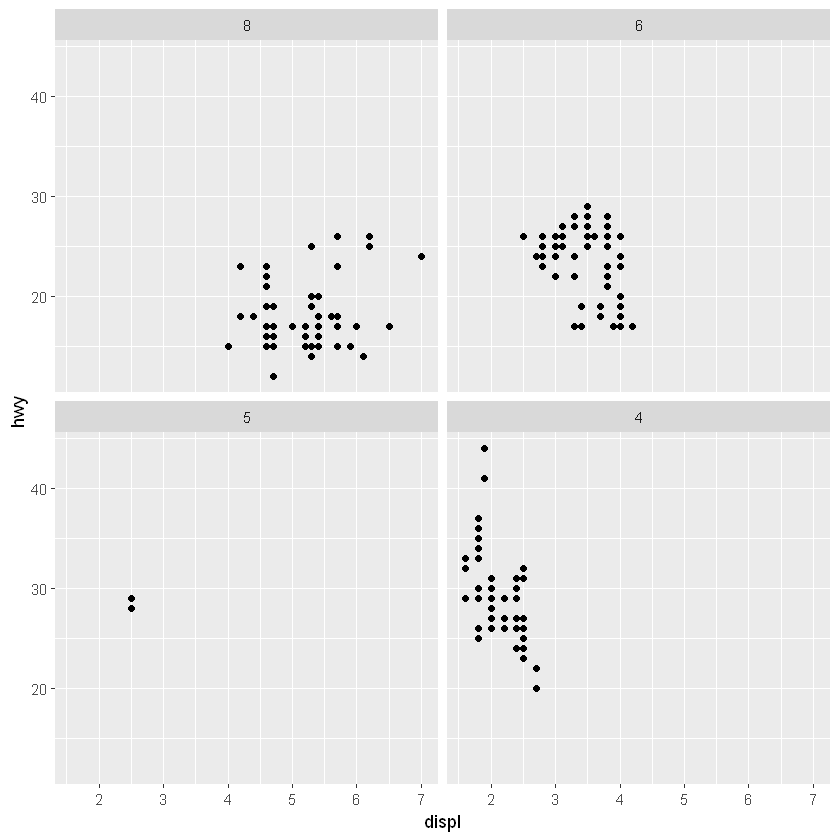

In [20]:
# To change the order in which the panels appear, change the levels
# of the underlying factor.
plot + 
facet_wrap(vars(factor(mpg$cyl, levels = c(8, 6, 5, 4))))

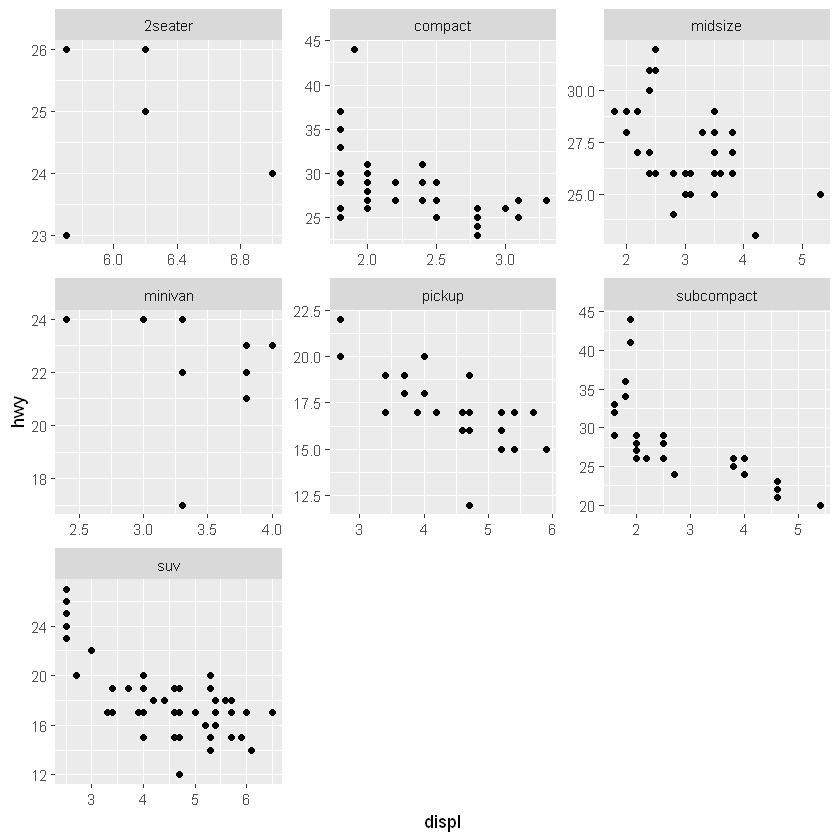

In [24]:
# By default, the same scales are used for all panels. You can allow
# scales to vary across the panels with the `scales` argument.
# Free scales make it easier to see patterns within each panel, but
# harder to compare across panels.


plot +
facet_wrap(~class, scales = 'free') #notice the xticklabels and yticklabels on each facet is different

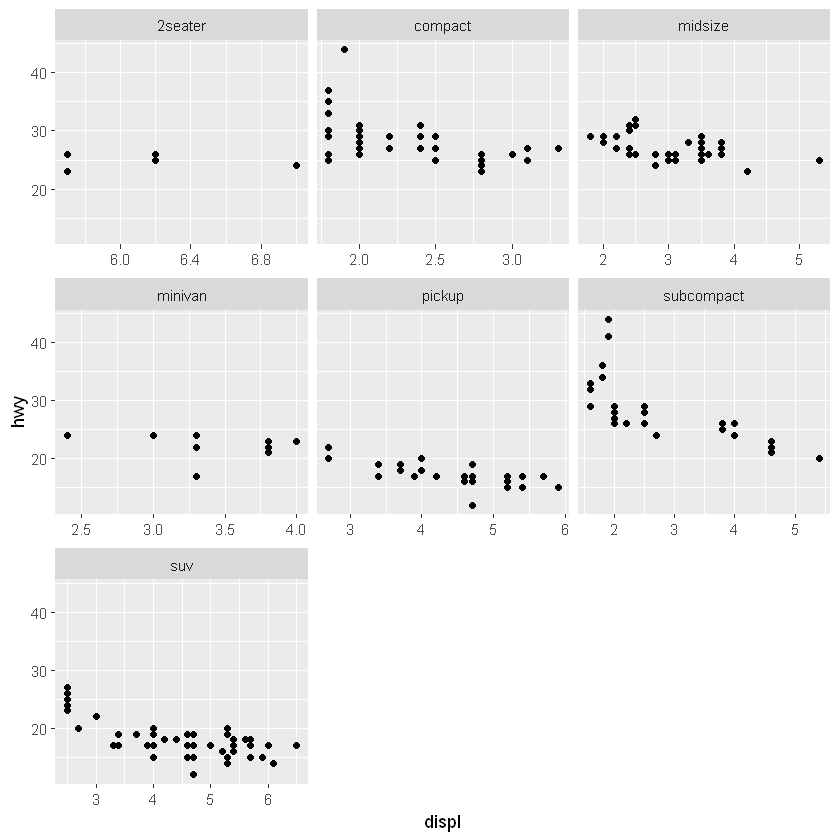

In [25]:
#make only xticks label on each facet different
plot +
facet_wrap(~class, scales = 'free_x') 

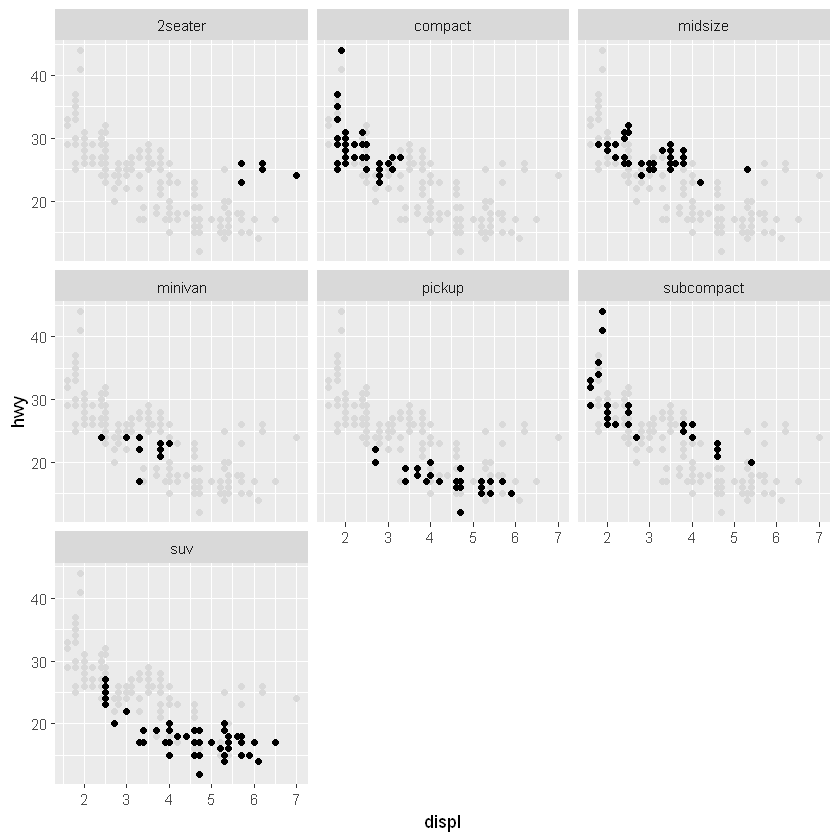

In [38]:
# To repeat the same data in every panel, simply construct a data frame
# that does not contain the faceting variable.

ggplot(mpg, aes(displ, hwy)) + 
#adding every data point in each facet
geom_point(data = mutate(mpg, class = NULL), color = 'grey85') +
geom_point() +
facet_wrap(~class) 



<hr>

In [42]:
head(economics_long)

date,variable,value,value01
1967-07-01,pce,506.7,0.0000000000
1967-08-01,pce,509.8,0.0002652497
1967-09-01,pce,515.6,0.0007615234
1967-10-01,pce,512.2,0.0004706043
1967-11-01,pce,517.4,0.0009155394
1967-12-01,pce,525.1,0.0015743854


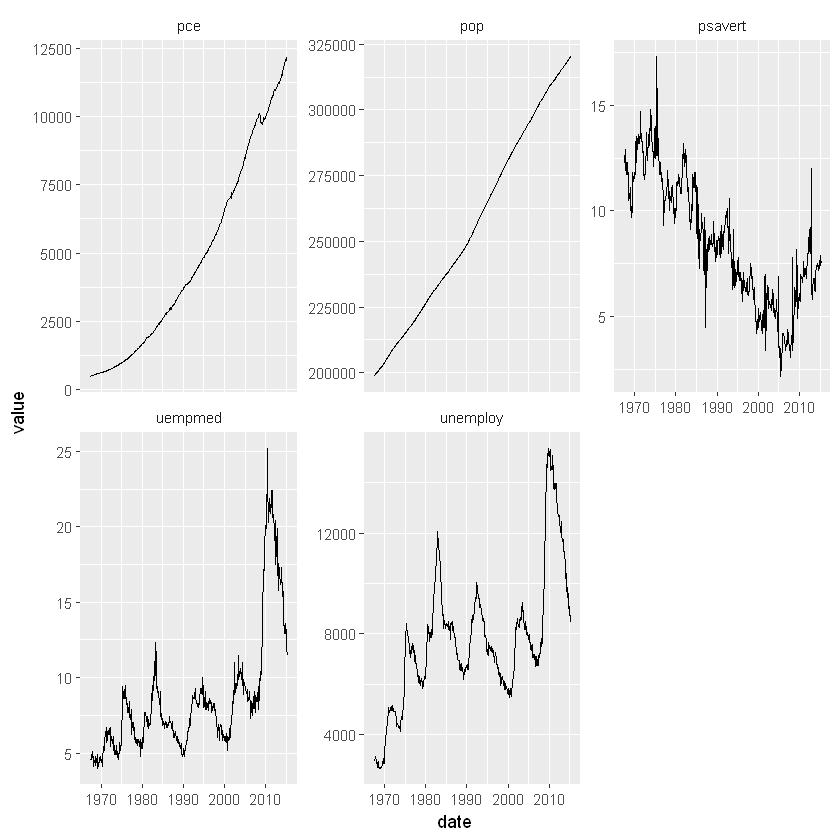

In [55]:
# Use `strip.position` to display the facet labels at the side of your
# choice. Setting it to `bottom` makes it act as a subtitle for the axis.
# This is typically used with free scales and a theme without boxes around
# strip labels.

ggplot(economics_long, aes(date, value)) +
geom_line() +
facet_wrap(~variable, 
           scale = 'free_y', #allow for each facet, the y scale can be different
           strip.position = 'top'
          ) +
theme(strip.background = element_blank())